In [1]:
import pandas as pd
import numpy as np
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [6]:
!pip install geopandas matplotlib
import geopandas as gpd

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)

In [8]:
geo_entrances = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON')

In [9]:
geo_entrances

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (-73.86835600032798 40.84916900104506)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (-73.86821300022677 40.84912800131844)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (-73.87349900050798 40.84122300105249)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (-73.87289199978331 40.84145300067447)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (-73.87962300013866 40.84081500075867)
5,2-5,Boston Rd & E Tremont Ave at NW corner,1739,http://web.mta.info/nyct/service/,POINT (-73.88000500027815 40.84043400087587)
6,2-5,Boston Rd & E Tremont Ave at NE corner,1740,http://web.mta.info/nyct/service/,POINT (-73.87983300021861 40.84035400111976)
7,2-5,Boston Rd & 178th St at SE corner,1741,http://web.mta.info/nyct/service/,POINT (-73.8795549998336 40.84063900116436)
8,2-5,Boston Rd & 178th St at NW corner,1742,http://web.mta.info/nyct/service/,POINT (-73.87939700013239 40.84107800066419)
9,2-5,Boston Rd & 174th St at SW corner,1743,http://web.mta.info/nyct/service/,POINT (-73.88804799985908 40.83732500129732)


In [10]:
geo_entrances.dtypes

line        object
name        object
objectid    object
url         object
geometry    object
dtype: object

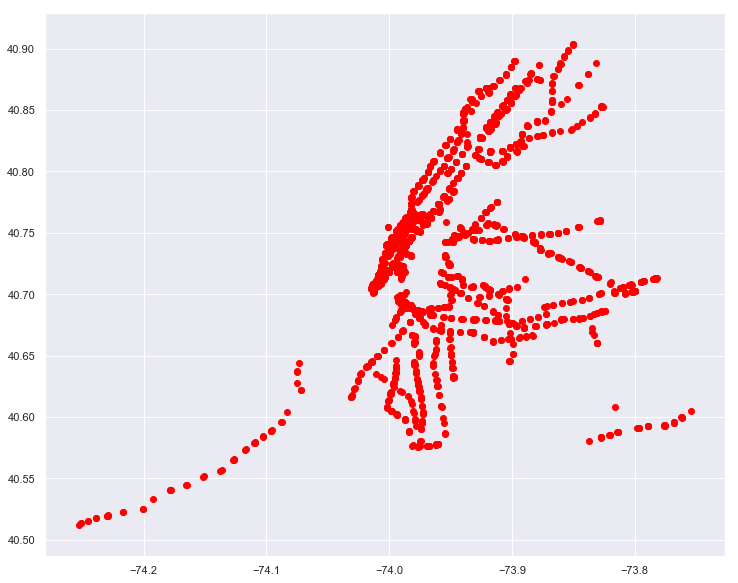

In [11]:
ax = geo_entrances.plot(color='red')